### Homework 5 

1. Logistic Regression

From the diabates dataset seen on previous classes, fit a logistic regression model using the binary variable Outcome as the outcome variable and all of the other continuous variables as predictors.

The idea is to find the model that best fit the data, and produce a list of optimal coefficients that will allow to predict outcomes from new data. For this you can use some or all of the resources seen in class, and other resources that can increase the resolution and accuracy of the model.

lm functions in R (or Python sklearn.linear_model) <br>
Cross-validation<br>
k-fold cross-validation<br>
Maximum likelihood estimation of coefficients <br>
Gradient Descent optimization<br>
Regularization<br>

Other methods for optimization such: forward-backward model selection

##### Examples..

[https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/](https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/)

[https://www.kaggle.com/c/titanic/discussion/13582#73042](https://www.kaggle.com/c/titanic/discussion/13582#73042)

[https://www.r-bloggers.com/logistic-regression-regularized-with-optimization/](https://www.r-bloggers.com/logistic-regression-regularized-with-optimization/)

[https://www.r-bloggers.com/predicting-creditability-using-logistic-regression-in-r-cross-validating-the-classifier-part-2-2/](https://www.r-bloggers.com/predicting-creditability-using-logistic-regression-in-r-cross-validating-the-classifier-part-2-2/)

In [1]:
library()

In [2]:
library(dplyr)
library(ggplot2)
library(mosaic)
library(swirl)
library(e1071)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggformula

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh



New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Loading required package: mosaicData

Loading required package: Matrix

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the M

In [3]:
df <- read.csv('/Users/markomiholjcic/Documents/BMI_6106/HomeWorks/Homework_5/diabetes.csv')

In [ ]:
df <- na.omit(df)

In [ ]:
sapply(df, class)

In [ ]:
model_1 <- glm(Outcome ~ Glucose + BloodPressure + SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+
            Age, family = "binomial", data = df) 
summary(model_1)

In [ ]:
library(caret)
library(randomForest)
library(varImp)

In [ ]:
df$Outcome = as.factor(df$Outcome)
set.seed(998)
indxTrain <- createDataPartition(y = df$Outcome,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$Outcome
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Outcome ~ Glucose + BloodPressure + SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+
            Age, data = training, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

10 fold Cross Validation was performed on the model. The Accuracy of the model is 79%. The model is better than the no information rate. 

In [ ]:
X <- caret::varImp(model)
plot(X)
X

The SkinThickness variable is not important to the model. Therefore, this variable can be removed in an attempt to improve the model.

In [ ]:
df$Outcome = as.factor(df$Outcome)
set.seed(998)
indxTrain <- createDataPartition(y = df$Outcome,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$Outcome
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Outcome ~ Glucose + BloodPressure + Insulin+BMI+DiabetesPedigreeFunction+
            Age, data = training, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

The model did not improve signinificantly with the removal of the SkinThickness variable. The accuracy and the 95% confidence interval have remained the same.

In [ ]:
X <- caret::varImp(model)
plot(X)
X

Blood Pressure, DiabetesPedigreeFunction, and Insulin have greatly decreased in importance after the removal of the SkinThickness variable. These two variables will be removed in an attempt to make the model more accuracte. 

In [ ]:
df$Outcome = as.factor(df$Outcome)
set.seed(998)
indxTrain <- createDataPartition(y = df$Outcome,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$Outcome
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Outcome ~ Glucose+BMI+
            Age, data = training, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

The accuracy has barely increased with the removal of Blood Pressure, DiabetesPedigreeFunction  and Insulin. The accuracy percentage is now at 79.4%.

In [ ]:
X <- caret::varImp(model)
plot(X)
X

After each removal, each variable continues to decrease in importance. There is one exception to this trend which is the glucose variable. 

In [ ]:
df$Outcome = as.factor(df$Outcome)
set.seed(998)
indxTrain <- createDataPartition(y = df$Outcome,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$Outcome
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Outcome ~ Glucose, data = training, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

When glucose is the only variable, the accuracy of the model falls. Therefore, the model including Glucose, BMI, and Age is the best model so far. 

Leave one out cross validation was performed on all of the tests as well.

In [ ]:
set.seed(998) 
train.control <- trainControl(method = "LOOCV")

model <- train(Outcome ~ Glucose + BloodPressure + SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+
            Age, data = training, method = "glm",
               trControl = train.control)

print(model)

In [ ]:
set.seed(998) 
train.control <- trainControl(method = "LOOCV")

model <- train(Outcome ~ Glucose + BloodPressure + Insulin+BMI+DiabetesPedigreeFunction+
            Age, data = training, method = "glm",
               trControl = train.control)

print(model)

In [ ]:
set.seed(998) 
train.control <- trainControl(method = "LOOCV")
# Train the model
model <- train(Outcome ~ Glucose+BMI+Age, data = training, 
                method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

In [ ]:
set.seed(998) 
train.control <- trainControl(method = "LOOCV")

model <- train(Outcome ~ Glucose, data = training, method = "glm",
               trControl = train.control)

print(model)

The Leave One Out Cross Validation was performed on all of the models. The three predictor model of BMI, Age, and Glucose was slightly less accurate than the six predictor model. The difference was 0.0007 between the two models. Regardless, the three predictor model of BMI, Age, and Glucose is a top performing model. 

In [ ]:
df <- read.csv('/Users/markomiholjcic/Documents/BMI_6106/HomeWorks/Homework_5/diabetes.csv')

In [ ]:
df <- na.omit(df)
dim(df)

In [ ]:
sapply(df, class)

In [ ]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,2:8])
xvars.test <- as.matrix(df[-trainingRowIndex,2:8])

y.train <- as.matrix(df[trainingRowIndex, 9])
y.test <- as.matrix(df[-trainingRowIndex, 9])

In [ ]:
library(glmnet)
fitlasso <- glmnet(xvars.train, y.train, family="binomial", alpha=1)
fitridge <- glmnet(xvars.train, y.train, family="binomial", alpha=0)
fitelnet <- glmnet(xvars.train, y.train, family="binomial", alpha=.5)

In [ ]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(xvars.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="binomial"))
}

In [ ]:
y.test

In [ ]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=xvars.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=xvars.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=xvars.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=xvars.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=xvars.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

Ridge has the smallest mse. Lasso and Elastic Net are not far behind. Lasso fit has the smallest AIC and BIC value. 

In [ ]:
coef(fitlasso,s=fitlasso$lambda[best_AIC_lasso])

In [ ]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,2:8])
xvars.test <- as.matrix(df[-trainingRowIndex,2:8])

y.train <- as.matrix(df[trainingRowIndex, 9])
y.test <- as.matrix(df[-trainingRowIndex, 9])

In [ ]:
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test, type = "response")

lasso_predict <- rep(0,nrow(xvars.test))
lasso_predict[yLassoAIC>=0.5] <- 1
table(pred=lasso_predict,true=y.test)
acc <- mean(lasso_predict==y.test)
print(paste("Accuracy of Lasso AIC = ",acc)) 

The lasso regulariation model did not produce a higher accuracy than the multivariable regression model involving Glucose, BMI, and Age. 

In [ ]:
acc <- array(numeric(),c(1,9))
for (i in 0:10) {
    
    set.seed(100+i)  # setting seed to reproduce results of random sampling
    trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df)) 
    
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[trainingRowIndex,2:8])
    xvars.test <- as.matrix(df[-trainingRowIndex,2:8])

    y.train <- as.matrix(df[trainingRowIndex, 9])
    y.test <- as.matrix(df[-trainingRowIndex, 9])

    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 1, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 1, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
    
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("10-fold Cross Validation for Lasso Regression: ", accuracy)

The 10-fold Cross Validation of the Lasso Regression produced worse results than the 10-fold Cross Validation for the other multivariable regression models. 

In [ ]:
acc <- NULL
for(i in 1:nrow(df))
{   
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[-i,2:8])
    xvars.test <- as.matrix(df[i,2:8])
    
    y.train <- as.matrix(df[-i, 9])
    y.test <- as.matrix(df[i, 9])
    
    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 1, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 1, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("Leave One Out Cross Validation for Lasso Regression: ", accuracy)

The Accuracy is lower for the Leave One Out Cross Validation in comparison to the 10 Fold Cross Validation for Lasso Regression. 

In [ ]:
acc <- array(numeric(),c(1,9))
for (i in 0:10) {
    
    set.seed(100+i)  # setting seed to reproduce results of random sampling
    trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df)) 
    
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[trainingRowIndex,2:8])
    xvars.test <- as.matrix(df[-trainingRowIndex,2:8])

    y.train <- as.matrix(df[trainingRowIndex, 9])
    y.test <- as.matrix(df[-trainingRowIndex, 9])

    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
    
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("10-fold Cross Validation for Rigid Regression: ", accuracy)

Rigid Regression had a higher accuracy than Lasso Regression for the 10 fold Cross Validation. Rigid Regression is less accurate than the three multivariable model of BMI, Age and Glucose.

In [ ]:
acc <- NULL
for(i in 1:nrow(df))
{   
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[-i,2:8])
    xvars.test <- as.matrix(df[i,2:8])
    
    y.train <- as.matrix(df[-i, 9])
    y.test <- as.matrix(df[i, 9])
    
    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("Leave One Out Cross Validation for Rigid Regression: ", accuracy)

The Accuracy is slightly better for the Leave One Out Cross Validation in comparison to the 10-fold Cross Validation for Rigid Regression. Rigid Regression is less accurate than the three multivariable model of BMI, Age and Glucose.

In [ ]:
acc <- array(numeric(),c(1,9))
for (i in 0:10) {
    
    set.seed(100+i)  # setting seed to reproduce results of random sampling
    trainingRowIndex <- sample(1:nrow(df), 0.75*nrow(df)) 
    
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[trainingRowIndex,2:8])
    xvars.test <- as.matrix(df[-trainingRowIndex,2:8])

    y.train <- as.matrix(df[trainingRowIndex, 9])
    y.test <- as.matrix(df[-trainingRowIndex, 9])

    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0.5, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0.5, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
    
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("10-fold Cross Validation for Elastic Net Regression: ", accuracy)

Elastic Net Regression had a higher accuracy than Lasso Regression for the 10 fold Cross Validation. However, it had a lower accuracy than Rigid Regression. 

In [ ]:
acc <- NULL
for(i in 1:nrow(df))
{   
    lambda_seq <- 10^seq(1, -1, by = -.01)
    
    xvars.train <- as.matrix(df[-i,2:8])
    xvars.test <- as.matrix(df[i,2:8])
    
    y.train <- as.matrix(df[-i, 9])
    y.test <- as.matrix(df[i, 9])
    
    model <- cv.glmnet(xvars.train, y.train, 
            alpha = 0.5, lambda = lambda_seq)

    # finding the best lamda
    min_lamb <- model$lambda.min
    
    lasso <- glmnet(xvars.train, y.train, alpha = 0.5, lambda = min_lamb)
    pred <- predict(lasso, s = min_lamb, newx = xvars.test, type = "response")

    lasso_predict <- rep(0,nrow(xvars.test))
    lasso_predict[pred>=0.5] <- 1
    
    acc[i] <- mean(lasso_predict==y.test)
}

In [ ]:
accuracy <- sum(acc)/length(acc)
cat("Leave One Out Cross Validation for Elastic Net Regression: ", accuracy)

The Accuracy is slightly higher for the Leave One Out Cross Validation for Elastic Net Regression. The accuracy is still lower than the multivariable models created above. 

Below is the model that produced the highest accuracy. It had the best accuracy for the 10-fold cross validation and it was a close second for the Leave One Out Cross Validation. The coefficients for the model are displayed below. 

In [ ]:
model_2 <- glm(Outcome ~ Glucose +BMI+
            Age, family = "binomial", data = df) 
summary(model_2)
cat("Coefficients: ")
coef(model_2)

2. Regularization.

Following the example given in class for the regularization procedures evaluate on each of the above simulations which is the most appropiate model (Ridge,Lasso,Elastic Net) using the appropiate variance measurements, produce the plots and write a small paragraph that explains the results. 

a.simulate new data, where the signal is strong but there is also lots of noise.

In [4]:
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models
# Generate data
set.seed(19874)
n <- 1000    # Number of observations
p <- 5000     # Number of predictors included in model
real_p <- 1500  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loaded glmnet 3.0-2




In [5]:
fitlasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fitridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fitelnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)

In [7]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

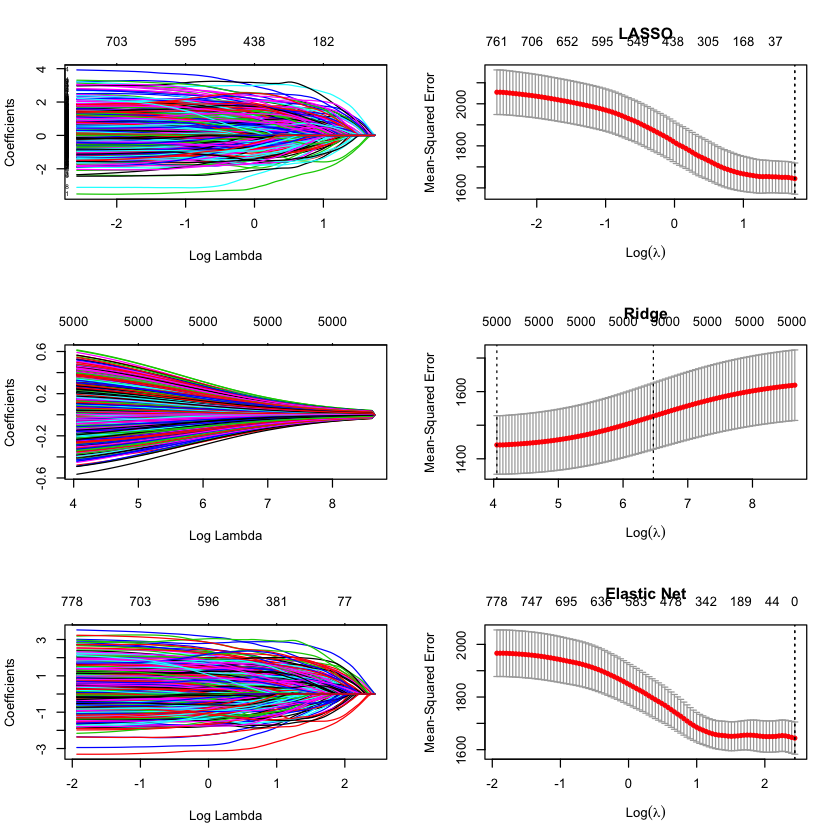

In [8]:
par(mfrow=c(3,2))

plot(fitlasso, xvar="lambda",label=TRUE)
plot(fit10, main="LASSO")

plot(fitridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fitelnet, xvar="lambda")
plot(fit5, main="Elastic Net")

The coefficient values go to zero for the Lasso regression, when the log of lambda is above one. Coefficient values go to zero when the log of lambda is above 8 for the Rigid regression. Coefficient values go to zero when the log of lambda is above 2 for the Elastic Net regression. For each regression model, there are multiple coefficients at every level of importance (largely important to minimally important). The mean squared error plots of the Lasso, Ridge, and Elastic regressions display the large amount of noise in the dataset. There is a lot of variance in the results, no matter which lambda is chosen for all three regressions. 

In [ ]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
mse0 <- mean((y.test - yhat0)^2)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
mse5 <- mean((y.test - yhat5)^2)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)
mse10 <- mean((y.test - yhat10)^2)

cat("MSE for Ridge Regression", mse0, "\n")
cat("MSE for Elastic Net Regression", mse5, "\n")
cat("MSE for Lasso Regression", mse10, "\n")

In [ ]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC
AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=x.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=x.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=x.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=x.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=x.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=x.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

The Mean Squared Error is large for all of the regressions. The most appropriate regression was the Ridge Regression with the lambda determined by the best AIC and the best BIC. It has the smallest mean squared error. 

b. signal is variable but there is high correlation among the variables.

In [ ]:
set.seed(19873)
n <- 100    # Number of observations
p <- 50     # Number of predictors included in model
CovMatrix <- outer(1:p, 1:p, function(x,y) {.7^abs(x-y)}) ##Produce a covariate matrix with x and y as output and a 0.7 correlation

x <- mvrnorm(n, rep(0,p), CovMatrix) ##Simulate from a multivariate normal distribution using the covariance matrix defined before
y <- 10 * apply(x[, 1:2], 1, sum) + 
  5 * apply(x[, 3:4], 1, sum) +
  apply(x[, 5:14], 1, sum) +
  rnorm(n)

train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [ ]:
fitlasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fitridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fitelnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)

In [ ]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

In [ ]:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fitlasso, xvar="lambda",label=TRUE)
plot(fit10, main="LASSO")

plot(fitridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fitelnet, xvar="lambda")
plot(fit5, main="Elastic Net")

The coefficient values go to zero for the Lasso regression, when the log of lambda is three. Coefficient values go to zero when the log of lambda is above 9 for the Rigid regression. Coefficient values go to zero when the log of lambda is above 3 for the Elastic Net regression. There are four important coefficients displayed in each regression. Of these four variables, two are very important, while the other two are moderately important. The mean squared error plots of the Lasso, Ridge, and Elastic regressions have areas with low variance and areas with high variance. The best ratio of variance and bias occurs approximately at a lambda of log of -2 for the lasso regression. The ridge regression has the best ratio of variance and bias occuring approximately at a lambda of log of 0.5. The elastic net regression has the best ratio of variance and bias occuring at a lambda of log of -1. 

In [ ]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
mse0 <- mean((y.test - yhat0)^2)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
mse5 <- mean((y.test - yhat5)^2)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)
mse10 <- mean((y.test - yhat10)^2)

cat("MSE for Ridge Regression", mse0, "\n")
cat("MSE for Elastic Net Regression", mse5, "\n")
cat("MSE for Lasso Regression", mse10, "\n")

In [ ]:
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC
AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=x.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=x.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=x.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=x.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=x.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=x.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

The Mean Squared Error is small for all of the regressions. The most appropriate regression was the Lasso Regression with the lambda determined by the best AIC and the best BIC. It has the smallest mean squared error. 